In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [51]:
import warnings

In [52]:
warnings.filterwarnings(action='ignore')

In [53]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

# Data Cleaning

In [54]:
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeNumber'], axis=1, inplace=True)
df.shape

(2940, 31)

### Removing Duplicates

In [55]:
df.drop_duplicates(inplace=True)
print(df.shape)
df.index

(1470, 31)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469],
           dtype='int64', length=1470)

### Removing Correlated Variables

In [56]:
df_final = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
df_final

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,24907,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,12290,4,No,3,3,1,3,3,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,21457,4,No,3,1,1,5,3,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,13243,2,No,3,4,0,3,2,9,0


# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Label Encoding

In [58]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
#     res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [59]:
encoded_df = preprocessor(df_final)
X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

### Standardizing the data

In [60]:
X.iloc[:, :]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,2,1102,2,1,1,1,2,0,94,...,19479,8,1,3,1,0,0,1,6,0
1,49,1,279,1,8,0,1,3,1,61,...,24907,1,0,4,4,1,3,3,10,1
2,37,2,1373,1,2,1,4,4,1,92,...,2396,6,1,3,2,0,3,3,0,0
3,33,1,1392,1,3,3,1,4,0,56,...,23159,1,1,3,3,0,3,3,8,3
4,27,2,591,1,2,0,3,1,1,40,...,16632,9,0,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,1,3,3,1,41,...,12290,4,0,3,3,1,3,3,5,0
1466,39,2,613,1,6,0,3,4,1,42,...,21457,4,0,3,1,1,5,3,7,1
1467,27,2,155,1,4,2,1,2,1,87,...,5174,1,1,4,2,1,0,3,6,0
1468,49,1,1023,2,2,2,3,4,1,63,...,13243,2,0,3,4,0,3,2,9,0


In [61]:
data = X.iloc[:, :].values
X_std = preprocessing.scale(data)
X_std = pd.DataFrame(X_std)
print (X_std)
print (type(X_std))

            0         1         2         3         4         5         6   \
0     0.446350  0.590048  0.742527  1.401512 -1.010909 -0.891688 -0.937414   
1     1.322365 -0.913194 -1.297775 -0.493817 -0.147150 -1.868426 -0.937414   
2     0.008343  0.590048  1.414363 -0.493817 -0.887515 -0.891688  1.316673   
3    -0.429664 -0.913194  1.461466 -0.493817 -0.764121  1.061787 -0.937414   
4    -1.086676  0.590048 -0.524295 -0.493817 -0.887515 -1.868426  0.565311   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.101159 -0.913194  0.202082 -0.493817  1.703764 -0.891688  0.565311   
1466  0.227347  0.590048 -0.469754 -0.493817 -0.393938 -1.868426  0.565311   
1467 -1.086676  0.590048 -1.605183 -0.493817 -0.640727  0.085049 -0.937414   
1468  1.322365 -0.913194  0.546677  1.401512 -0.887515  0.085049  0.565311   
1469 -0.320163  0.590048 -0.432568 -0.493817 -0.147150  0.085049  0.565311   

            7         8         9   ...        15        16    

In [62]:
cols={}
for i in range(len(df.columns)):
    cols[i] = df.columns[i]

X_std.rename(columns = cols, inplace=True)
X_std.reset_index()
X_std

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,0.726020,2.125136,1.591746,-0.426230,-1.584178,-0.932014,-2.171982,-2.493820,-0.164613,-0.679146
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,1.488876,-0.678049,-0.628241,2.346151,1.191438,0.241988,0.155707,0.338096,0.488508,-0.368715
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-1.674841,1.324226,1.591746,-0.426230,-0.658973,-0.932014,0.155707,0.338096,-1.144294,-0.679146
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,1.243211,-0.678049,1.591746,-0.426230,0.266233,-0.932014,0.155707,0.338096,0.161947,0.252146
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,0.325900,2.525591,-0.628241,-0.426230,1.191438,0.241988,0.155707,0.338096,-0.817734,-0.058285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,-0.284329,0.523316,-0.628241,-0.426230,0.266233,0.241988,0.155707,0.338096,-0.327893,-0.679146
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,1.004010,0.523316,-0.628241,-0.426230,-1.584178,0.241988,1.707500,0.338096,-0.001333,-0.368715
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,-1.284418,-0.678049,1.591746,2.346151,-0.658973,0.241988,-2.171982,0.338096,-0.164613,-0.679146
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.150393,-0.277594,-0.628241,-0.426230,1.191438,-0.932014,0.155707,-1.077862,0.325228,-0.679146


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Model Implementation

In [64]:
lm = LinearRegression()
X = X_std
y = y
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit()
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.660
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           5.57e-08
Time:                        07:14:52   Log-Likelihood:                -73.666
No. Observations:                 294   AIC:                             199.3
Df Residuals:                     268   BIC:                             295.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1625      0.020      8.278      0.000       0.124       0.201
Age                         -0.0370      0.023     -1.631      0.104      -0.082       0.008
Attrition                    0.0153      0.020      0.774      0.440      -0.024       0.054
BusinessTravel               0.0203      0.021      0.987      0.325      -0.020       0.061
DailyRate                    0.0500      0.027      1.843      0.066      -0.003       0.103
Department                   0.0084      0.019      0.434      0.664      -0.030       0.047
DistanceFromHome            -0.0001      0.021     -0.006      0.995      -0.042       0.042
Education                    0.0216      0.021      1.047      0.296      -0.019       0.062
EducationField              -0.0626      0.019     -3.232      0.001      -0.101      -0.024
EnvironmentSatisfaction      0.0127      0.020      0.638      0.524      -0.027       0.052
Gender                      -0.0068      0.019     -0.356      0.722      -0.044       0.031
HourlyRate                  -0.0214      0.020     -1.085      0.279      -0.060       0.017
JobInvolvement               0.0096      0.025      0.379      0.705      -0.040       0.059
JobLevel                    -0.0721      0.019     -3.701      0.000      -0.111      -0.034
JobRole                      0.0149      0.027      0.548      0.584      -0.039       0.068
JobSatisfaction             -0.0378      0.025     -1.514      0.131      -0.087       0.011
MaritalStatus               -0.0235      0.020     -1.191      0.235      -0.062       0.015
MonthlyIncome                0.0304      0.022      1.386      0.167      -0.013       0.074
MonthlyRate                  0.0860      0.020      4.275      0.000       0.046       0.126
NumCompaniesWorked          -0.0132      0.019     -0.689      0.491      -0.051       0.024
OverTime                    -0.0437      0.020     -2.163      0.031      -0.083      -0.004
PercentSalaryHike           -0.0606      0.028     -2.169      0.031      -0.116      -0.006
PerformanceRating           -0.0316      0.019     -1.658      0.099      -0.069       0.006
RelationshipSatisfaction    -0.0069      0.019     -0.368      0.713      -0.044       0.030
StockOptionLevel            -0.0268      0.027     -0.983      0.327      -0.081       0.027
TotalWorkingYears            0.0315      0.024      1.298      0.195      -0.016       0.079
==============================================================================
Omnibus:                       58.462   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.881
Skew:                           1.249   Prob(JB):                     8.26e-20
Kurtosis:                       3.967   Cond. No.                     

# Logistic Regression

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [67]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [68]:
print(X[0:10,:])

[[ 4.46350404e-01  5.90048338e-01  7.42526534e-01  1.40151234e+00
  -1.01090934e+00 -8.91688250e-01 -9.37413693e-01 -6.60530674e-01
  -1.22474487e+00  1.38313827e+00  3.79672129e-01  1.03271569e+00
   1.15325359e+00  1.23682046e+00 -1.08349514e-01  7.26019941e-01
   2.12513592e+00  1.59174553e+00 -4.26230015e-01 -1.58417824e+00
  -9.32014389e-01 -2.17198183e+00 -2.49382042e+00 -1.64613109e-01
  -6.79145684e-01]
 [ 1.32236521e+00 -9.13194394e-01 -1.29777460e+00 -4.93817137e-01
  -1.47149720e-01 -1.86842575e+00 -9.37413693e-01  2.54624925e-01
   8.16496581e-01 -2.40676770e-01 -1.02616674e+00  6.26374133e-01
  -6.60853181e-01 -1.33282084e-01 -2.91718590e-01  1.48887614e+00
  -6.78049393e-01 -6.28241122e-01  2.34615106e+00  1.19143799e+00
   2.41988312e-01  1.55707081e-01  3.38096164e-01  4.88507728e-01
  -3.68715287e-01]
 [ 8.34299820e-03  5.90048338e-01  1.41436324e+00 -4.93817137e-01
  -8.87515111e-01 -8.91688250e-01  1.31667267e+00  1.16978053e+00
   8.16496581e-01  1.28472523e+00 -1.0

### Train - Test Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

### Confusion Matrix

In [72]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[239,   6],
       [ 33,  16]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

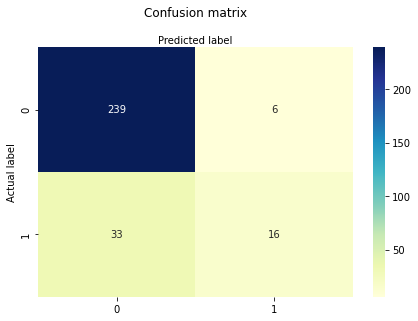

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Accuracy, Precision and Recall

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8673469387755102
Precision: 0.7272727272727273
Recall: 0.32653061224489793


### Area Under the Curve

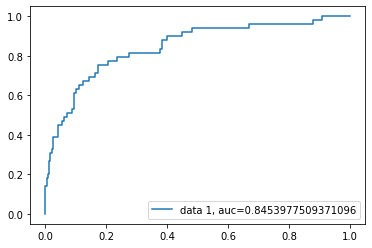

In [75]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Machine

### Train - Test Split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Implementation with default HyperParameters

In [77]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8571428571428571


### Linear Kernel

In [78]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8333333333333334


### Polynomial Kernel

In [79]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8639455782312925


### Radial Kernel

In [80]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8571428571428571


### Optimizing HyperParameter C

In [81]:
from sklearn.model_selection import cross_val_score

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.8489795918367348, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654]


Text(0, 0.5, 'Cross-Validated Accuracy')

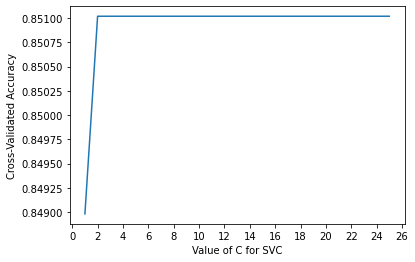

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [83]:
C_range=list(np.arange(2,4,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654, 0.8510204081632654]


### Optimizing HyperParameter Gamma

In [84]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.8387755102040817, 0.8387755102040817, 0.8408163265306122, 0.8482993197278912, 0.8387755102040817, 0.8387755102040817, 0.8387755102040817]


Text(0, 0.5, 'Cross-Validated Accuracy')

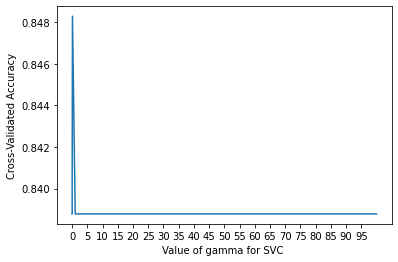

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

### Finding the best parameters using GidSearchCV

In [86]:
from sklearn.svm import SVC
svm_model= SVC()

In [87]:
tuned_parameters = {
 'C': (np.arange(2,3,0.1)) , 'kernel': ['linear', 'poly', 'rbf'],
 'C': (np.arange(2,3,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['linear', 'poly', 'rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.1,1], 'C':(np.arange(2,3,0.1)) , 'kernel':['poly', 'linear','rbf']
    }

In [88]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [89]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.8596841952774156


In [90]:
print(model_svm.best_params_)

{'C': 2.900000000000001, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [92]:
y_pred=model_svm.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [93]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[241,   4],
       [ 37,  12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

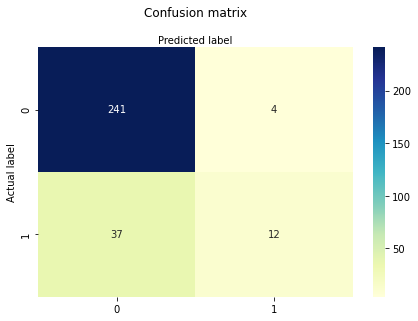

In [94]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8605442176870748
Precision: 0.75
Recall: 0.24489795918367346
